In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

In [2]:


other_paths = sorted(glob.glob('../*/*.info.csv'))
others = [pd.read_csv(p) for p in other_paths]

In [3]:
all_df = pd.concat(others, axis=0, 
                   ignore_index=True)

all_df['safe'] = (all_df['off_target_hits'] == 0)
all_df['broad'] = (all_df['on_target_freq'] >= 0.75)
all_df['effective'] = (all_df['mean_rc'] <= 0.1)

all_df['safe_broad'] = all_df['safe'] & all_df['broad']
all_df['safe_effective'] = all_df['safe'] & all_df['effective']
all_df['safe_broad_effective'] = all_df['safe'] & all_df['effective'] & all_df['broad']


all_df.head()

,protospacer,chrom,start,hit,strand,mismatches,on_target_freq,off_target_hits,num_lethal,mean_rc,cas,pam_motif,mismatch,safe,broad,effective,safe_broad,safe_effective,safe_broad_effective
0,CTAATACTGTATCATCTGCT,HXB2,2328,CTTCTAATACTGTATCATCTGCTCCTG,-,0,0.028075,NaN,12,0.172905,ASp2Cas12l,CCY,NaN,False,False,False,False,False,False
1,CCATAGTGCTTCCTGCTGCT,HXB2,7791,CGCCCATAGTGCTTCCTGCTGCTCCCA,-,0,0.000000,NaN,8,0.152263,ASp2Cas12l,CCY,NaN,False,False,False,False,False,False
2,GTATTACTACTGCCCCTTCA,HXB2,4959,CTTGTATTACTACTGCCCCTTCACCTT,-,0,0.207219,NaN,15,0.098961,ASp2Cas12l,CCY,NaN,False,False,True,False,False,False
3,GCACTGTACCCCCCAATCCC,HXB2,4792,CCTGCACTGTACCCCCCAATCCCCCCT,-,0,0.991310,7.0,19,0.103309,ASp2Cas12l,CCY,NaN,False,True,False,False,False,False
4,CACTGTACCCCCCAATCCCC,HXB2,4791,CTGCACTGTACCCCCCAATCCCCCCTT,-,0,0.000000,NaN,19,0.103309,ASp2Cas12l,CCY,NaN,False,False,False,False,False,False


In [4]:
tdf = all_df.groupby(['cas', 'pam_motif'])[['safe', 'broad', 'effective', 'safe_broad_effective']].sum()
tdf['uniq_sites'] = all_df.query('safe_broad_effective').groupby(['cas', 'pam_motif'])['start'].nunique().fillna(0)
tdf.reset_index(inplace=True)
tdf

,cas,pam_motif,safe,broad,effective,safe_broad_effective,uniq_sites
0,ASp2Cas12l,CCY,17,255,6696,1,1.0
1,AacCas12b,TTN,6,1047,8946,1,1.0
2,AsCas12a,TTTN,14,329,8427,3,2.0
3,Asp2Cas12l,CCY,11,267,6742,2,1.0
4,BthCas12b,ATTN,12,135,7379,8,2.0
5,Cas12c2,TN,1,5207,9606,1,1.0
6,Cas12d,TA,7,850,8809,0,NaN
7,Cas12e,TTCN,19,83,6313,0,NaN
8,Cas12h1,RTR,1,615,8471,1,1.0
9,Cas12j,TBN,12,3534,9333,0,NaN


In [5]:
tdf.to_excel('broad_v_safe.xlsx', index=False)

In [6]:
counts = {'N': 4, 'R': 2, 'V': 3, 'Y': 2, 'A': 1, 'C': 1, 'G': 1, 'T': 1, 'B': 3, 'W': 2}

def pam_spec(pam_motif):
    
    possible = 1
    hits = 1
    for l in pam_motif:
        possible *= 4
        hits *= counts[l]
        
    return hits/possible

tdf['pam_specificity'] = tdf['pam_motif'].map(pam_spec)
tdf

,cas,pam_motif,safe,broad,effective,safe_broad_effective,uniq_sites,pam_specificity
0,ASp2Cas12l,CCY,17,255,6696,1,1.0,0.031250
1,AacCas12b,TTN,6,1047,8946,1,1.0,0.062500
2,AsCas12a,TTTN,14,329,8427,3,2.0,0.015625
3,Asp2Cas12l,CCY,11,267,6742,2,1.0,0.031250
4,BthCas12b,ATTN,12,135,7379,8,2.0,0.015625
5,Cas12c2,TN,1,5207,9606,1,1.0,0.250000
6,Cas12d,TA,7,850,8809,0,NaN,0.062500
7,Cas12e,TTCN,19,83,6313,0,NaN,0.015625
8,Cas12h1,RTR,1,615,8471,1,1.0,0.062500
9,Cas12j,TBN,12,3534,9333,0,NaN,0.187500


In [7]:
ndf = pd.melt(tdf, id_vars = ['cas', 'pam_motif', 'pam_specificity'],
              value_vars = ['safe', 'broad', 'effective'], 
              value_name = 'count', var_name = 'type')
ndf['log2_spec'] = np.log2(ndf['pam_specificity'])
ndf.head()

,cas,pam_motif,pam_specificity,type,count,log2_spec
0,ASp2Cas12l,CCY,0.031250,safe,17,-5.0
1,AacCas12b,TTN,0.062500,safe,6,-4.0
2,AsCas12a,TTTN,0.015625,safe,14,-6.0
3,Asp2Cas12l,CCY,0.031250,safe,11,-5.0
4,BthCas12b,ATTN,0.015625,safe,12,-6.0


In [8]:
import matplotlib.ticker as ticker

def reciprocal_formatter(x, pos):
    'The two args are the value and tick position'
    return r'$\frac{1}{%d}$' % (1/x)

def degen_formatter(x, pos):
    'Create a degenerate codon of this value'
    
    const_num = -np.emath.logn(4, x)
    assert (const_num-np.floor(const_num)) < 0.1
    
    return 'N' + 'G'*int(const_num)
    
    
    

def fix_ax(ax, axis_type='fraction'):
    
    ax.set_xscale('logit')
    
    ax.set_xlim(0.75, (1/2)**8)
    ax.xaxis.set_minor_formatter(ticker.NullFormatter())
    if axis_type == 'fraction':
        ax.xaxis.set_major_formatter(ticker.FuncFormatter(reciprocal_formatter))
        ax.set_xticks((1/2)**np.arange(1, 8))
        
    elif axis_type == 'degenerate':
        
        ax.xaxis.set_major_formatter(ticker.FuncFormatter(degen_formatter))
        ax.set_xticks((1/4)**np.arange(1, 5))
    
    # Use LogLocator to set the tick values
    #ax.xaxis.set_major_locator(ticker.LogLocator(base=2))
    # Use FuncFormatter to format the tick values
    
    ax.set_ylim(0, None)
    ax.set_xlabel('PAM Specificity')

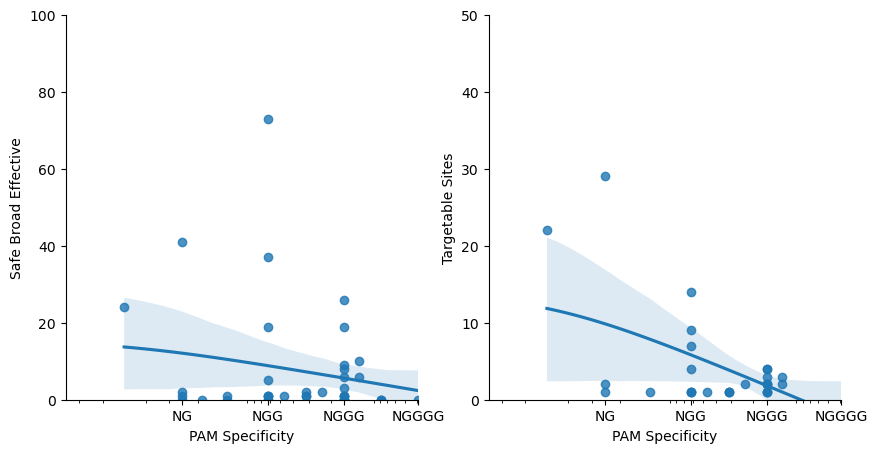

In [9]:
fig, (spec_ax, bvs_ax) = plt.subplots(1,2,figsize=(10,5))


sns.regplot(data = tdf,
            x = 'pam_specificity', y = 'safe_broad_effective',
            logx=True, ax=spec_ax)
spec_ax.set_ylabel('Safe Broad Effective')
sns.despine(ax=spec_ax)
spec_ax.set_ylim(0, 100)

sns.regplot(data = tdf,
                x = 'pam_specificity',  y = 'uniq_sites',
                ax = bvs_ax, logx=True)
bvs_ax.set_ylabel('Targetable Sites')
sns.despine(ax=bvs_ax)
bvs_ax.set_ylim(0, 50)

fix_ax(spec_ax, axis_type='degenerate')
fix_ax(bvs_ax, axis_type='degenerate')

fig.savefig('pam_spec.png', dpi=300)

In [10]:
from scipy.stats import linregress

linregress(np.log10(tdf['pam_specificity']), tdf['safe_broad_effective'])

LinregressResult(slope=5.372717441204646, intercept=15.316673591640452, rvalue=0.2002249231602113, pvalue=0.19797034555305437, stderr=4.105813236716253, intercept_stderr=6.493689179982114)

In [16]:
linregress(np.log10(tdf.dropna(subset=['uniq_sites'])['pam_specificity']), tdf.dropna(subset=['uniq_sites'])['uniq_sites'])

LinregressResult(slope=6.656198427700269, intercept=13.856395712871926, rvalue=0.5190882107553485, pvalue=0.003909134507228552, stderr=2.1092469077244047, intercept_stderr=3.2184849263755395)